The goal of this notebook is to work through material from the first two lessons of the fastai course.  
The way we do this is to train an image classifier on a different dataset.

First attempt: [Stanford dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/). The goal is to classify the dog breed.

Let's start by looking at untar_data.

In [2]:
from fastai.vision.all import *

In [4]:
doc(untar_data)

Seems like it will put some data somewhere for us. By default everything will be put under `~/.fastai/`, which seems fine by me.

In [6]:
image_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
annotation_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'

In [8]:
import tarfile

In [11]:
def extract_func(fname, dest=None):
    if dest is None: dest = Path(fname).parent
    tarfile.open(fname, 'r').extractall(dest)
    
img_fp = untar_data(image_url, extract_func=extract_func)
ann_fp = untar_data(annotation_url, extract_func=extract_func)

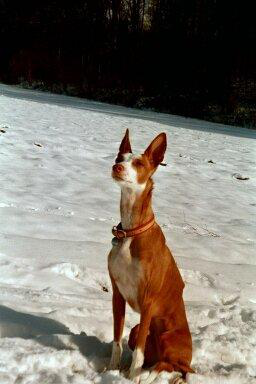

In [50]:
fp = img_fp.ls()[0].ls()[0]
img = PILImage.create(fp)
img

In [52]:
fp2breed = lambda fp: fp.parent.stem.split('-')[1]

That seems to work pretty nice. Doesn't seem like the annotations are of much use because we have the folder labels.
Next, we're supposed to load data via the `DataBlock` API, so let's see what that's all about.

In [58]:
doc(DataBlock)

This is a bit harder to unravel. Probably need to pass in an ImageBlock and a CategoryBlock?

In [75]:
dogs = DataBlock((ImageBlock, CategoryBlock), get_items=get_image_files,
          splitter=RandomSplitter(valid_pct=0.2, seed=0), get_y=fp2breed,
                item_tfms=Resize(128))

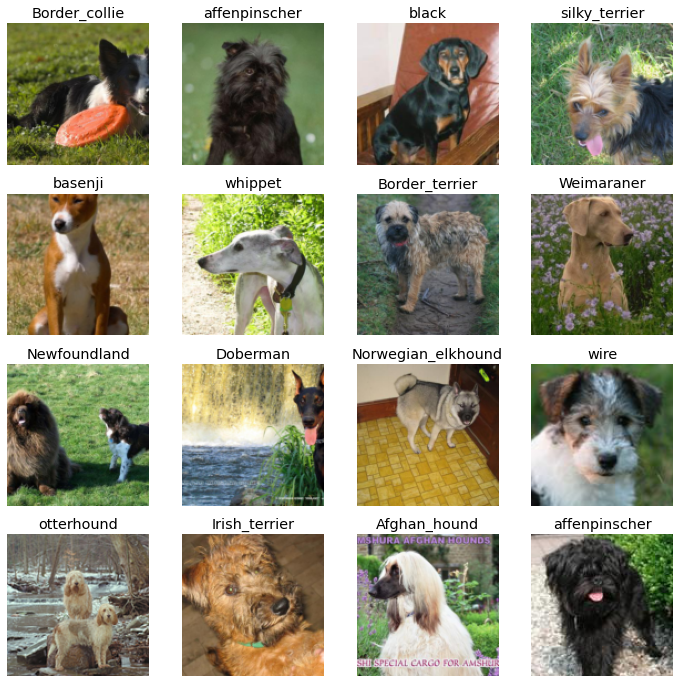

In [81]:
dls = dogs.dataloaders(img_fp)
dls.valid.show_batch(max_n=16, nrows=4)

Great, we have some data! Now let's learn some shit. The parameter in fine_tune means the number of epochs we train for.

In [86]:
doc(cnn_learner(dls, resnet34).fine_tune)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/user/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [87]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.632734,1.627009,0.445578,00:29


epoch,train_loss,valid_loss,error_rate,time
0,1.687419,1.329741,0.376093,00:30
1,1.220201,1.120975,0.325559,00:29
2,0.702469,1.057206,0.307337,00:30


Could probably get a lot more mileage out of this!

In [88]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.720547,1.179388,0.323858,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.631680,1.181129,0.317298,00:29
1,0.757066,1.349978,0.352770,00:29
2,0.663186,1.357316,0.333819,00:29
3,0.426912,1.320155,0.331633,00:30
4,0.244504,1.297545,0.309038,00:29
5,0.139276,1.292481,0.306608,00:30
6,0.091962,1.277977,0.302478,00:29


In [89]:
interp = ClassificationInterpretation.from_learner(learn)

In [98]:
interp.most_confused(5)

[('Eskimo_dog', 'Siberian_husky', 14),
 ('Siberian_husky', 'Eskimo_dog', 12),
 ('toy_poodle', 'miniature_poodle', 11),
 ('Norfolk_terrier', 'Norwich_terrier', 10),
 ('Siberian_husky', 'malamute', 10),
 ('American_Staffordshire_terrier', 'Staffordshire_bullterrier', 9),
 ('miniature_schnauzer', 'standard_schnauzer', 9),
 ('Cardigan', 'Pembroke', 8),
 ('Walker_hound', 'English_foxhound', 8),
 ('Rhodesian_ridgeback', 'redbone', 7),
 ('Tibetan_terrier', 'Shih', 7),
 ('collie', 'Border_collie', 7),
 ('malamute', 'Eskimo_dog', 7),
 ('Lhasa', 'Maltese_dog', 6),
 ('Tibetan_terrier', 'Lhasa', 6),
 ('Yorkshire_terrier', 'silky_terrier', 6),
 ('collie', 'Shetland_sheepdog', 6),
 ('malinois', 'German_shepherd', 6),
 ('silky_terrier', 'Yorkshire_terrier', 6),
 ('Border_collie', 'collie', 5),
 ('Brittany_spaniel', 'Welsh_springer_spaniel', 5),
 ('English_foxhound', 'Walker_hound', 5),
 ('French_bulldog', 'Boston_bull', 5),
 ('Irish_wolfhound', 'Scottish_deerhound', 5),
 ('Italian_greyhound', 'whippe

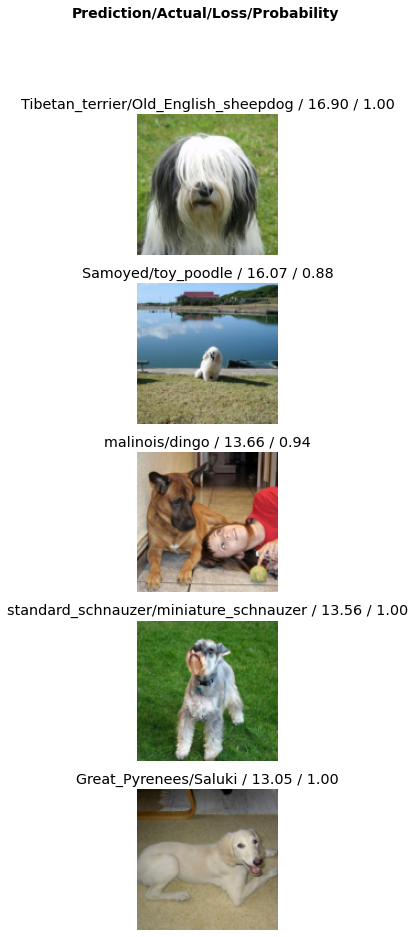

In [101]:
interp.plot_top_losses(5, nrows=5)

Seems fairly okay. Let's see what it does with a picture of an italian greyhound!

In [124]:
from fastai.vision.widgets import *
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

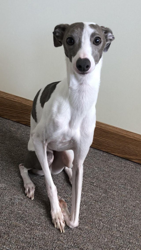

In [125]:
img = PILImage.create(upload.data[0])
img.to_thumb(250)

In [128]:
learn.predict(img)

('toy_terrier',
 tensor(116),
 tensor([7.6775e-06, 4.2027e-05, 5.5980e-06, 1.2366e-02, 5.1823e-04, 1.5039e-05, 6.1117e-05, 7.1768e-07, 1.9855e-04, 1.2329e-04, 1.0662e-05, 1.5788e-03, 1.1807e-06, 3.2890e-05, 1.7212e-04, 3.9130e-04,
         2.7098e-05, 8.6926e-02, 3.5892e-06, 1.8880e-04, 3.3902e-03, 5.4396e-05, 1.1087e-05, 2.7171e-05, 1.7438e-03, 5.5681e-04, 3.0807e-05, 2.5504e-04, 3.4024e-06, 3.0917e-03, 2.6949e-05, 5.0489e-06,
         4.1983e-03, 4.6144e-05, 7.4607e-06, 3.4371e-05, 5.5755e-07, 1.4204e-01, 8.0090e-04, 2.5872e-05, 5.2417e-03, 3.4308e-06, 2.8369e-06, 2.8600e-06, 5.5245e-05, 6.1803e-04, 5.0075e-06, 2.7628e-06,
         3.2419e-04, 1.3530e-06, 2.5852e-06, 1.7382e-05, 1.4446e-03, 8.1481e-05, 4.5916e-04, 3.0230e-06, 7.4564e-04, 3.8399e-05, 4.5537e-05, 1.8057e-04, 3.5064e-07, 2.4625e-05, 4.3058e-04, 1.3139e-05,
         7.2820e-04, 1.7221e-04, 8.3659e-06, 6.4020e-07, 2.9001e-06, 8.2216e-03, 1.2572e-04, 7.9316e-05, 1.4009e-05, 4.7437e-05, 1.1688e-05, 3.2195e-02, 1.1463e-05, 4

Oh no! But this is a picture head-on whereas italian greyhounds are known for their tiny waist. Let's try another one.

In [117]:
from fastai.vision.widgets import *
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

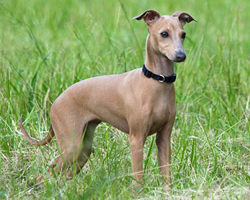

In [122]:
img = PILImage.create(upload.data[0])
img.to_thumb(250)

In [120]:
print(f'You uploaded a picture of a {learn.predict(img)[0]}!')

You uploaded a picture of a Italian_greyhound!


Now let's try Victor, but I have to wait for Ada...

In [129]:
from fastai.vision.widgets import *
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

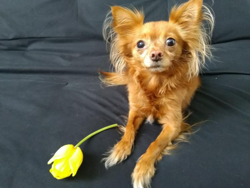

In [137]:
img = PILImage.create(upload.data[-1])
img.to_thumb(250)

In [138]:
print(f'You uploaded a picture of a {learn.predict(img)[0]}!')

You uploaded a picture of a Yorkshire_terrier!


In [134]:
max(learn.predict(img)[2])

tensor(0.6643)

In [143]:
names = sorted([name.stem.split('-')[-1].lower() for name in img_fp.iterdir()])
for name in names:
    print(name)

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle
bedlington_terrier
bernese_mountain_dog
blenheim_spaniel
bloodhound
bluetick
border_collie
border_terrier
borzoi
boston_bull
bouvier_des_flandres
boxer
brabancon_griffon
briard
brittany_spaniel
bull_mastiff
cairn
cardigan
chesapeake_bay_retriever
chihuahua
chow
clumber
coated_retriever
coated_retriever
coated_wheaten_terrier
cocker_spaniel
collie
dandie_dinmont
dhole
dingo
doberman
english_foxhound
english_setter
english_springer
entlebucher
eskimo_dog
french_bulldog
german_shepherd
giant_schnauzer
golden_retriever
gordon_setter
great_dane
great_pyrenees
greater_swiss_mountain_dog
groenendael
haired_fox_terrier
haired_pointer
ibizan_hound
irish_setter
irish_terrier
irish_water_spaniel
irish_wolfhound
italian_greyhound
japanese_spaniel
keeshond
kelpie
kerry_blue_terrier
komondor
kuvasz
labrador_retriever
lakeland_terrier
leonberg
lhasa
malamute
mali

Turns out, Victor's breed (Russian toy terrier) is not even in the dataset, hahahahahaha